# Developing the CoordCBP method in NiMARE

In [1]:
import os.path as op

import pandas as pd
import seaborn as sns

import nimare
from nimare.parcellate import CoordCBP

In [2]:
mask_file = "/Users/taylor/Documents/nbc/nimare-paper/data/amygdala_roi.nii.gz"
dset_file = "temp_dset2.pkl.gz"
if not op.isfile(dset_file):
    dset = nimare.dataset.Dataset.load(
        "/Users/taylor/Documents/nbc/nimare-paper/data/neurosynth_dataset_with_mkda_ma.pkl.gz"
    )
    dset = dset.slice(dset.ids[:500])
    dset.masker = dset.masker.mask_img
    dset.save(dset_file)
else:
    dset = nimare.dataset.Dataset.load(dset_file)

In [3]:
%%time
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
filters = [30, 40, 50, 60, 70, 80]
cbp = CoordCBP(
    target_mask=mask_file,
    n_clusters=clusters,
    n=filters,
    meta_estimator=nimare.meta.cbma.MKDADensity,
)

CPU times: user 7.8 ms, sys: 10.2 ms, total: 18 ms
Wall time: 17.1 ms


In [4]:
%%time
out = cbp.fit(dset)

CPU times: user 5min 5s, sys: 1min 1s, total: 6min 6s
Wall time: 2min 48s


In [17]:
silhouettes = out[1]
ratios = out[2]
deviant_props = out[3]
vi_results = out[4][:, :, 0]

df = pd.DataFrame(columns=["filter", "cluster", "silhouette", "ratio", "Percentage misclassified voxels", "vi"])
for i_filter, filter_val in enumerate(filters):
    for j_cluster, cluster_val in enumerate(clusters):
        row = [
            filter_val, 
            cluster_val, 
            silhouettes[i_filter, j_cluster],
            ratios[i_filter, j_cluster],
            deviant_props[i_filter, j_cluster],
            vi_results[i_filter, j_cluster],
        ]
        df.loc[len(df.index)] = row


<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

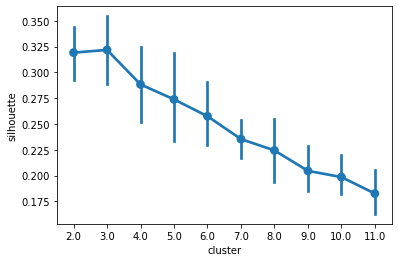

In [18]:
# Should be going up
sns.pointplot(x="cluster", y="silhouette", data=df)

<AxesSubplot:xlabel='cluster', ylabel='ratio'>

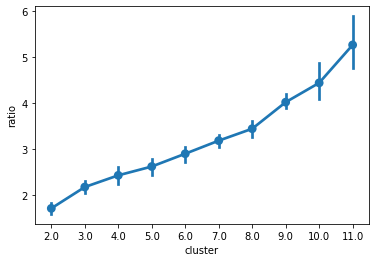

In [19]:
# Going up as expected
sns.pointplot(x="cluster", y="ratio", data=df)

<AxesSubplot:xlabel='cluster', ylabel='Percentage misclassified voxels'>

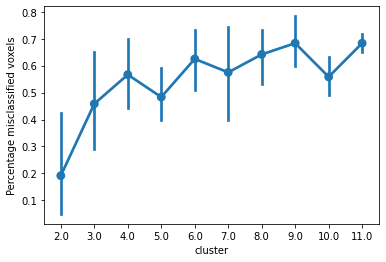

In [20]:
# Should be going up
sns.pointplot(x="cluster", y="Percentage misclassified voxels", data=df)

<AxesSubplot:xlabel='cluster', ylabel='vi'>

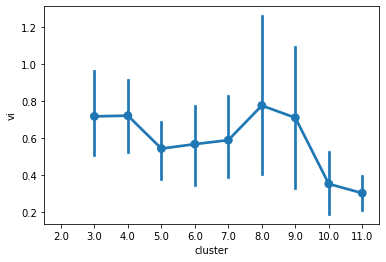

In [21]:
# Should be going up
sns.pointplot(x="cluster", y="vi", data=df)